<h2 style="color:mediumaquamarine; font-family: ariel">About the data</h2>

### Coffee Shop Sales
Transaction records for Maven Roasters, a fictitious coffee shop operating out of three NYC locations. Dataset includes the transaction date, timestamp and location, along with product-level details.

### Data Preview
<ol>
<li>transaction_id : Unique sequential ID representing an individual transaction</li>
<li>transaction_date : Date of the transaction (MM/DD/YY)</li>
<li>transaction_time : Timestamp of the transaction (HH:MM:SS)</li>
<li>transaction_qty : Quantity of items sold</li>
<li>store_id : Unique ID of the coffee shop where the transaction took place</li>
<li>store_location : Location of the coffee shop where the transaction took place</li>
<li>product_id : Unique ID of the product sold</li>
<li>unit_price : Retail price of the product sold</li>
<li>product_category : Description of the product category</li>
<li>product_type : Description of the product type</li>
<li>product_detail : Description of the product detail</li>
</ol>

<h4 style= "color:red;">Dataset owner: ahmed abbas </h4>

Dataset can be downloaded from [kaggle](https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales/data).


<h2 style="color:mediumaquamarine; font-family: ariel">About the author</h2>

I am Minhaj Ur Riyan, a passionate data analyst with a strong interest in data visualization and machine learning. With over 2 years of experience in the field of technology, I strive to combine creativity and analytical thinking in my work. My goal is to uncover insights that drive decision-making and innovation.

In this project, I aimed to analyze the sales of a coffe shop based on the transaction records, perform trend analysis and predict future sales evident from the previous trends.

Feel free to connect with me on my LinkedIn Profile Connect with me on [LinkdIn](https://www.linkedin.com/in/minhaj-ur-riyan-98690431a/).

---

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [6]:
# Loading dataset

df = pd.read_excel('Coffee Shop Sales.xlsx')

<h2 style="color:mediumaquamarine; font-family: ariel">Information about the dataset</h2>

In [8]:
# Features in the dataset
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [9]:
# Shape of the dataset
df.shape

(149116, 11)

In [10]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [11]:
# descriptive statistics of the dataset
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [7]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


### Quick look:

<ul>
<li>The dataset contains ~150k rows and 11 features.</li>
<li>5 of the features are numeric, 1 datetime and the rest are of object type.</li>
<li>No null values.</li>
</ul>

##### Next step: Data preprocessing 

<h2 style="color:mediumaquamarine; font-family: ariel">Data Preprocessing</h2>

In [12]:
# Checking for missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

No Null values in the data.

In [13]:
# Checking for duplicate values
df.duplicated().sum()

0

No duplicated values as well.

In [14]:
# Lets analyze the datatypes
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [16]:
# Random sample of the dataset
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
87145,87399,2023-05-07,13:07:13,1,8,Hell's Kitchen,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti
76201,76371,2023-04-26,07:09:36,2,8,Hell's Kitchen,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg
34958,35015,2023-03-02,19:01:39,2,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
76069,76239,2023-04-25,18:01:20,1,3,Astoria,39,4.25,Coffee,Barista Espresso,Latte Rg
105031,105285,2023-05-23,13:08:37,2,8,Hell's Kitchen,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg


The data looks pretty clean and processed, so no further preprocessing is required.

#### Next step:
We can proceed with Exploratory data analysis to gain insight on the data.

<h2 style="color:mediumaquamarine; font-family: ariel">Exploratory Data Analysis</h2>

*Goals: Collect metadata and Answer unique questions about the data*

In [18]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [20]:
# At what locations are the stores located
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [22]:
# What are the categories of the products and how many records for each category?
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [24]:
# Which store sells what products?
df.groupby('store_location')['product_category'].value_counts()

store_location   product_category  
Astoria          Coffee                20025
                 Tea                   16260
                 Bakery                 7289
                 Drinking Chocolate     4300
                 Flavours               1490
                 Coffee beans            502
                 Loose Tea               344
                 Branded                 279
                 Packaged Chocolate      110
Hell's Kitchen   Coffee                20187
                 Tea                   15277
                 Bakery                 7617
                 Drinking Chocolate     3763
                 Flavours               2370
                 Coffee beans            720
                 Loose Tea               485
                 Packaged Chocolate      197
                 Branded                 119
Lower Manhattan  Coffee                18204
                 Tea                   13912
                 Bakery                 7890
                 Dr

In [26]:
# Which product category is sold the most?
df['product_category'].value_counts().sort_values(ascending=False)

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

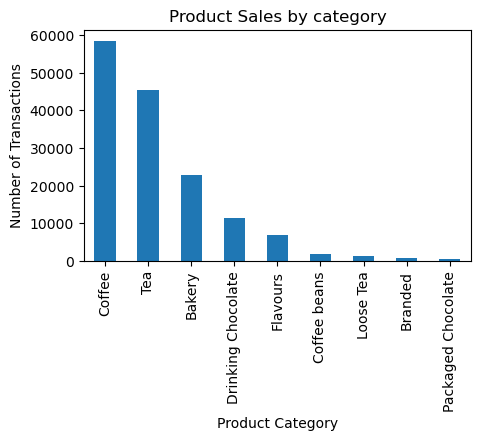

In [30]:
plt.figure(figsize=(5,3))
df['product_category'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Product Sales by category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.show()

Coffee is the most sold product followed by tea.

In [33]:
# Which coffee type is the most pow
df[df['product_category']=='Coffee'].groupby('product_category')['product_type'].value_counts()

product_category  product_type         
Coffee            Gourmet brewed coffee    16912
                  Barista Espresso         16403
                  Organic brewed coffee     8489
                  Drip coffee               8477
                  Premium brewed coffee     8135
Name: count, dtype: int64

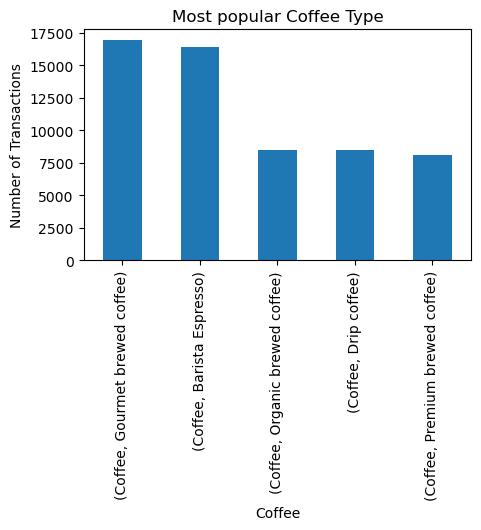

In [35]:
plt.figure(figsize=(5,3))
df[df['product_category']=='Coffee'].groupby('product_category')['product_type'].value_counts().plot(kind='bar')
plt.title('Most popular Coffee Type')
plt.xlabel('Coffee')
plt.ylabel('Number of Transactions')
plt.show()

In [36]:
# Lets start exploring the data with some questions

# 1. Do people tend to purchase expensive products more often?

df['unit_price'].nunique()

41

In [37]:
min_price, max_price = df['unit_price'].min(), df['unit_price'].max()

print(f'Min Price: {min_price} , Max Price {max_price}')

Min Price: 0.8 , Max Price 45.0


Since we have a lot of products, each having a different price. We have to create bins for price.

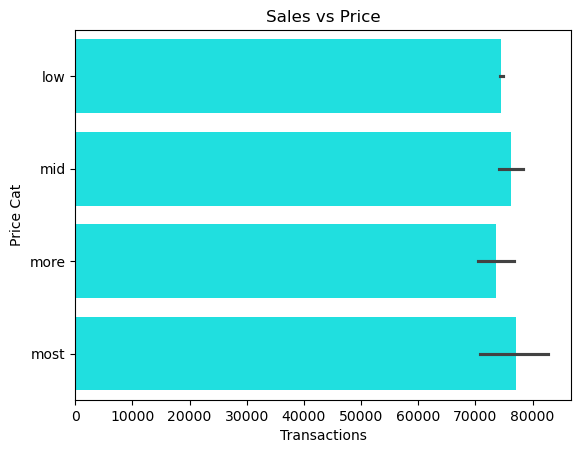

In [46]:
bins = pd.cut(df['unit_price'],bins=[0,10,20,30,45], labels=['low', 'mid', 'more', 'most'])

sns.barplot(bins, color='cyan')
plt.title('Sales vs Price')
plt.xlabel('Transactions')
plt.ylabel('Price Cat')
plt.show()


No such evidence of high sales for high price.

In [47]:
# Which branch has the most number of transactions recorded?

df.groupby('store_location')['transaction_id'].count()

store_location
Astoria            50599
Hell's Kitchen     50735
Lower Manhattan    47782
Name: transaction_id, dtype: int64

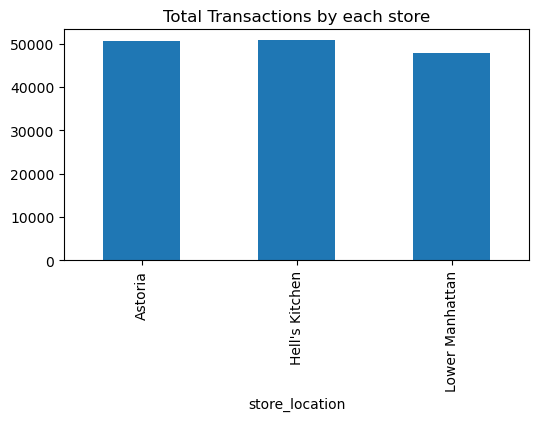

In [54]:
plt.figure(figsize=(6,3))
df.groupby('store_location')['transaction_id'].count().plot(kind='bar')
plt.title('Total Transactions by each store')
plt.show()

### Some complex questions to analyze



In [55]:
# 1 - How have Maven Roasters sales trended over time?

df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [68]:
# Lets get date, month and year out of transaction_date
df['temp_date'] = df['transaction_date'].astype(str)
df['temp_date'].dtype


dtype('O')

In [69]:
df['temp_date']

0         2023-01-01
1         2023-01-01
2         2023-01-01
3         2023-01-01
4         2023-01-01
             ...    
149111    2023-06-30
149112    2023-06-30
149113    2023-06-30
149114    2023-06-30
149115    2023-06-30
Name: temp_date, Length: 149116, dtype: object

In [72]:
df[['year', 'month', 'day']] = df['temp_date'].apply(lambda x: x.split('-')).apply(pd.Series)

ValueError: Columns must be same length as key

In [75]:
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,temp_date,year,month,day
113244,113506,2023-05-31,10:19:23,2,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-05-31,2023,05,31
74316,74486,2023-04-23,18:15:12,1,5,Lower Manhattan,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,2023-04-23,2023,04,23
147644,147981,2023-06-29,15:12:09,2,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-06-29,2023,06,29
109405,109659,2023-05-27,13:05:01,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,2023-05-27,2023,05,27
39894,40001,2023-03-10,08:33:44,2,3,Astoria,48,2.50,Tea,Brewed Black tea,English Breakfast Rg,2023-03-10,2023,03,10


In [79]:
df['year'].unique()

array(['2023'], dtype=object)

In [78]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06'], dtype=object)

The data is of the first 6 months of 2023

In [80]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,temp_date,year,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01,2023,01,01
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01,2023,01,01
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01,2023,01,01
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01,2023,01,01
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01,2023,01,01


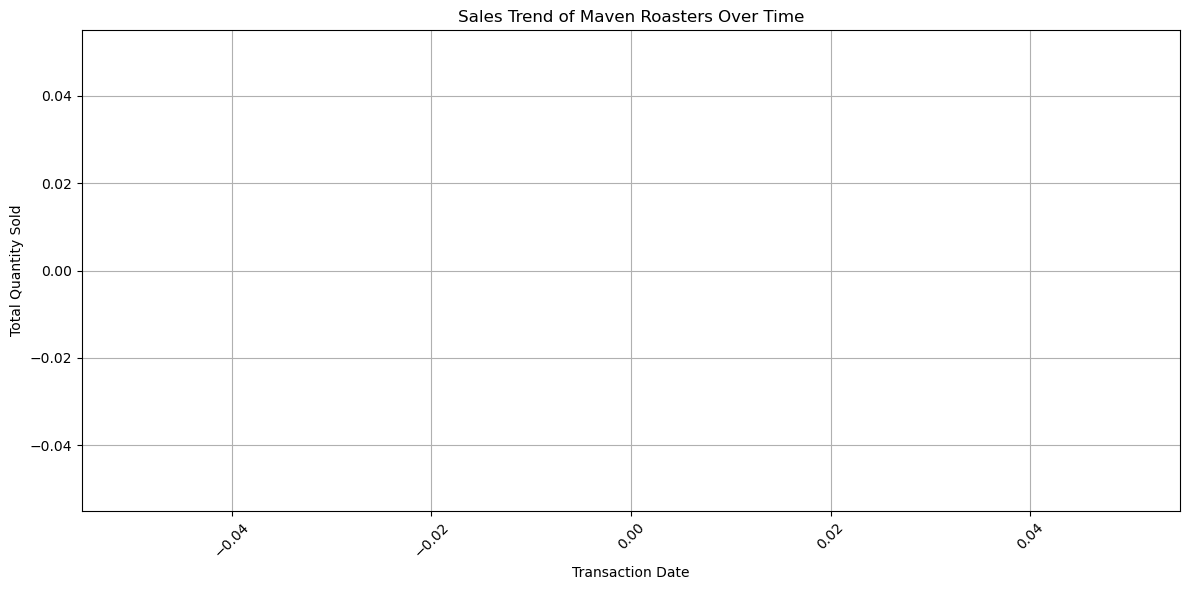

In [81]:
# Lets see the sale trends over time

# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Filter for Maven Roasters
maven_sales = df[df['store_location'] == 'Maven Roasters']

# Group by transaction_date and sum the quantities
sales_trend = maven_sales.groupby('transaction_date')['transaction_qty'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='transaction_date', y='transaction_qty', marker='o')
plt.title('Sales Trend of Maven Roasters Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Lower Manhattan Sales Data:
        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149045          149386       2023-06-30         18:28:56                2   
149046          149387       2023-06-30         18:30:02                1   
149047          149388       2023-06-30         18:30:02                1   
149094          149435       2023-06-30         19:40:09                2   
149110          149451       2023-06-30         20:16:31                2   

        store_id   store_location  product_id 

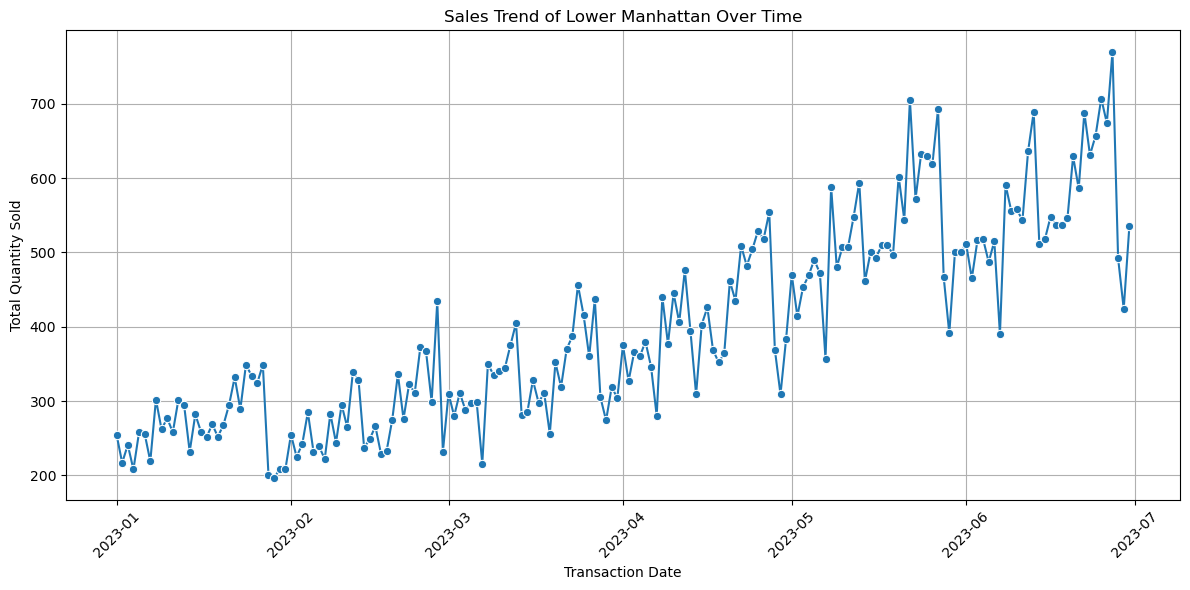

In [83]:
# Lets analyze the sales trends over time

# Filter for Lower Manhattan
lower_manhattan_sales = df[df['store_location'] == "Lower Manhattan"]

# Check if we have any sales for Lower Manhattan
print("\nLower Manhattan Sales Data:")
print(lower_manhattan_sales)

# Ensure transaction_date is in datetime format
lower_manhattan_sales['transaction_date'] = pd.to_datetime(lower_manhattan_sales['transaction_date'])

# Group by transaction_date and sum the quantities
sales_trend = lower_manhattan_sales.groupby('transaction_date')['transaction_qty'].sum().reset_index()

# Check the aggregated sales trend
print("\nSales Trend Data for Lower Manhattan:")
print(sales_trend)

# Create the plot if there are any sales
if not sales_trend.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sales_trend, x='transaction_date', y='transaction_qty', marker='o')
    plt.title('Sales Trend of Lower Manhattan Over Time')
    plt.xlabel('Transaction Date')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No sales data available for Lower Manhattan.")


Total Sales by Day of the Week:
day_of_week
Monday       31231
Tuesday      30449
Wednesday    30625
Thursday     31162
Friday       31207
Saturday     29614
Sunday       30182
Name: transaction_qty, dtype: int64


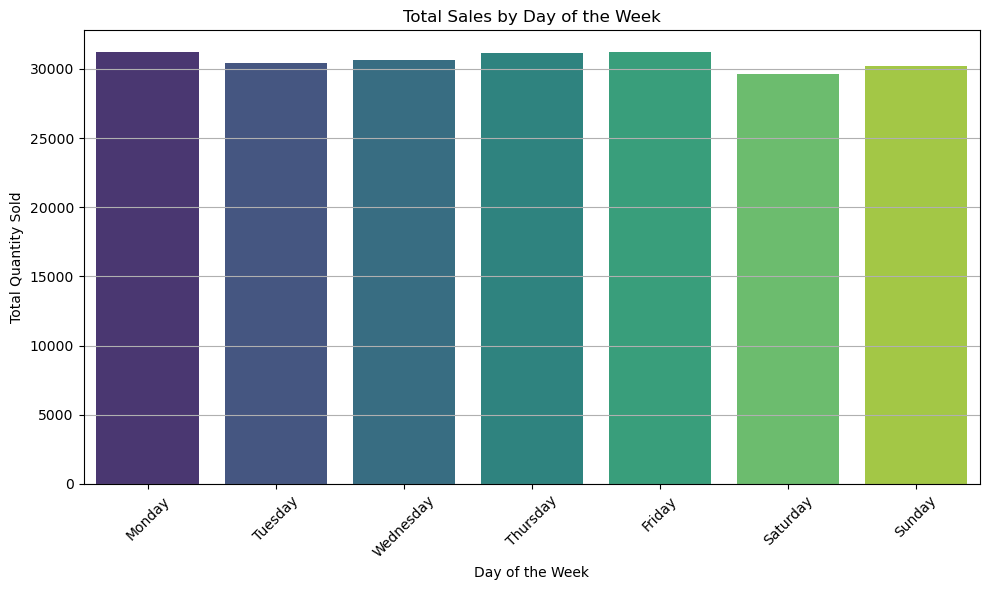

In [84]:
# 2 - Which days of the week tend to be busiest, and why do you think that's the case?

# Assuming df is your original DataFrame
# Ensure transaction_date is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract the day of the week
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Group by day of the week and sum the transaction quantities
busiest_days = df.groupby('day_of_week')['transaction_qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Check the aggregated sales by day of the week
print("\nTotal Sales by Day of the Week:")
print(busiest_days)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

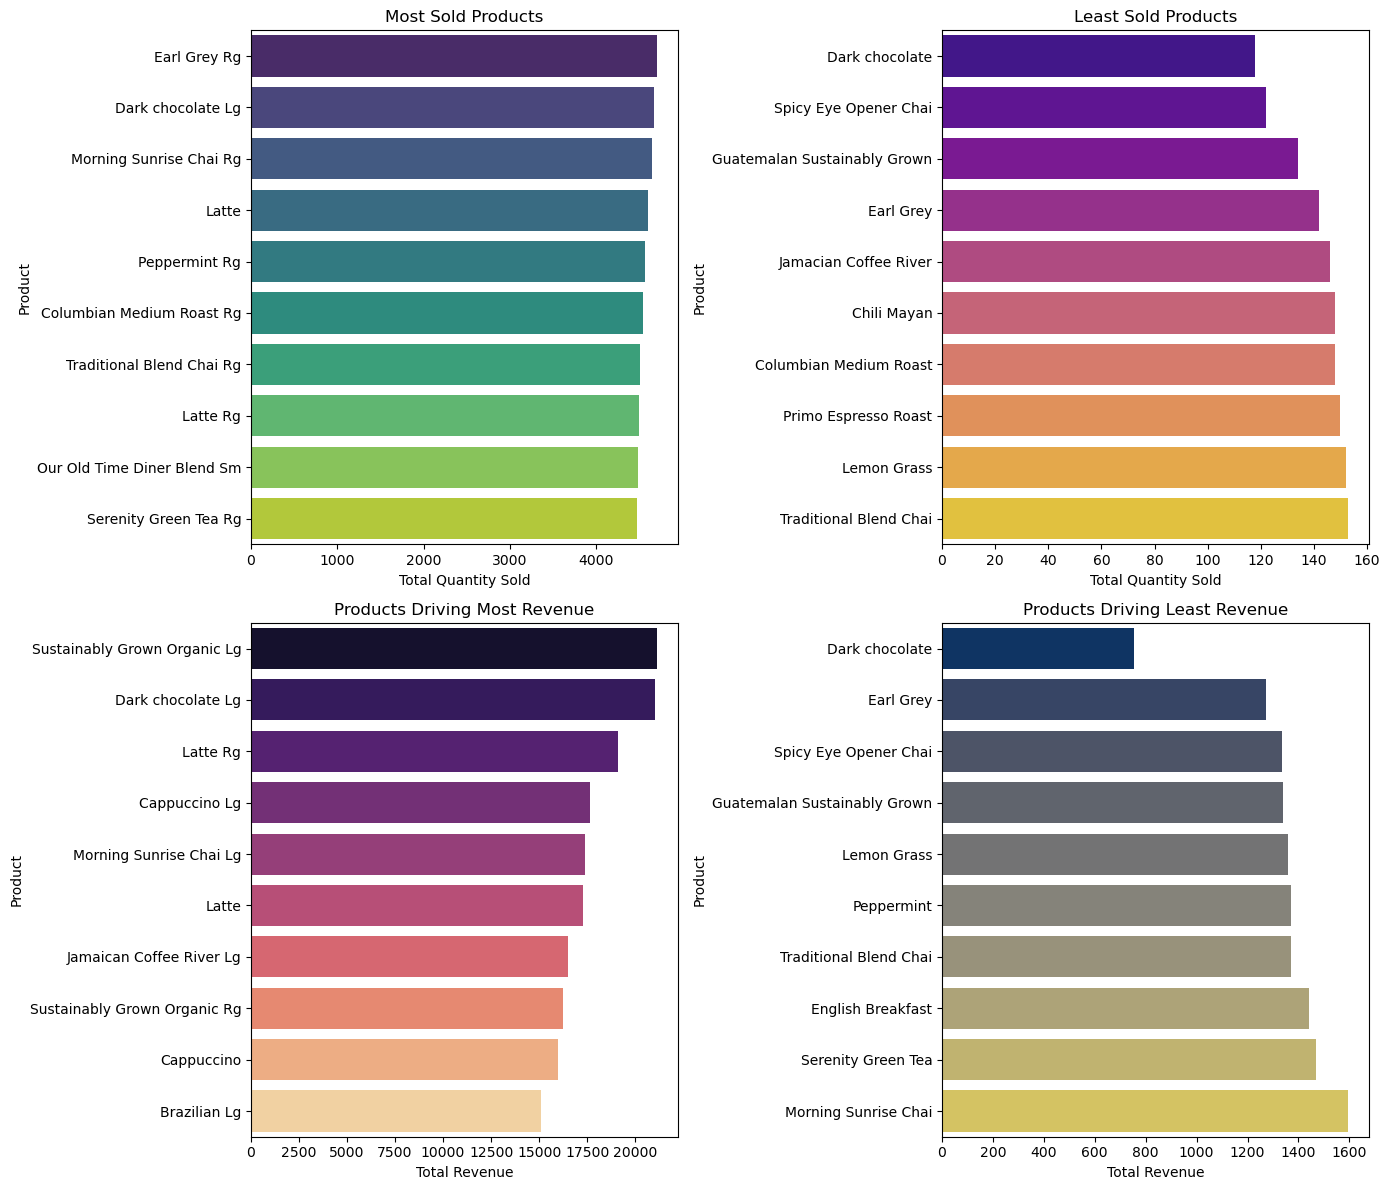

In [87]:
# 3 - Which products are sold most and least often? Which drive the most revenue for the business?


# Calculate total quantity sold per product
quantity_sold = df.groupby('product_detail')['transaction_qty'].sum().reset_index()

# Calculate total revenue per product
df['revenue'] = df['transaction_qty'] * df['unit_price']
revenue_generated = df.groupby('product_detail')['revenue'].sum().reset_index()

# Merge quantity and revenue data
product_summary = pd.merge(quantity_sold, revenue_generated, on='product_detail')
product_summary.columns = ['Product', 'Total Quantity Sold', 'Total Revenue']

# Sort by quantity sold and revenue
most_sold = product_summary.sort_values(by='Total Quantity Sold', ascending=False).head(10)
least_sold = product_summary.sort_values(by='Total Quantity Sold', ascending=True).head(10)
most_revenue = product_summary.sort_values(by='Total Revenue', ascending=False).head(10)
least_revenue = product_summary.sort_values(by='Total Revenue', ascending=True).head(10)

# Plotting
plt.figure(figsize=(14, 12))

# Most Sold Products
plt.subplot(2, 2, 1)
sns.barplot(data=most_sold, x='Total Quantity Sold', y='Product', palette='viridis')
plt.title('Most Sold Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')

# Least Sold Products
plt.subplot(2, 2, 2)
sns.barplot(data=least_sold, x='Total Quantity Sold', y='Product', palette='plasma')
plt.title('Least Sold Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')

# Products Driving Most Revenue
plt.subplot(2, 2, 3)
sns.barplot(data=most_revenue, x='Total Revenue', y='Product', palette='magma')
plt.title('Products Driving Most Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

# Products Driving Least Revenue
plt.subplot(2, 2, 4)
sns.barplot(data=least_revenue, x='Total Revenue', y='Product', palette='cividis')
plt.title('Products Driving Least Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

---

# Summary of Observations and Suggestions for Improving Overall Sales

## Summary of Observations

1. **Sales Trends Over Time**:
   - The total sales in Lower Manhattan show an upward trend, with fluctuations indicating peaks and troughs that may correlate with specific events or seasonal changes.

2. **Sales by Day of the Week**:
   - Sales are relatively consistent across the days, with Sundays being the highest and Mondays typically showing lower sales. This suggests increased customer activity during weekends.

3. **Product Performance**:
   - The most sold products include *Dark Chocolate* and various herbal teas, indicating a preference for premium and health-conscious options.
   - Conversely, products like *Lemon Grass* and *Spicy Eye Opener* are among the least sold, which may suggest either a lack of demand or insufficient marketing efforts.

4. **Revenue Generation**:
   - Products driving the most revenue align closely with the best-selling items, indicating that higher sales volume correlates with significant revenue contributions.
   - Products generating the least revenue mirror the least sold items, highlighting a direct relationship between sales volume and revenue.

## Suggestions for Improving Overall Sales

1. **Enhance Marketing for Best Sellers**:
   - Implement targeted marketing campaigns for top-selling products, promoting them through social media, in-store displays, and special bundles to further boost visibility and sales.

2. **Evaluate Underperforming Products**:
   - Conduct customer surveys or focus groups to gather feedback on least sold items. Based on the insights, consider rebranding, revising recipes, or removing these products from the menu.

3. **Optimize Weekend Promotions**:
   - Since weekends show higher sales, develop special promotions or events that capitalize on this trend, such as weekend-only discounts, live music, or themed events to draw in more customers.

4. **Leverage Seasonal Trends**:
   - Analyze seasonal sales patterns and adjust inventory and marketing strategies accordingly. For instance, promote warm beverages during colder months or refreshing options during summer.

5. **Customer Engagement Initiatives**:
   - Increase customer engagement through loyalty programs or membership benefits that encourage repeat purchases. Consider introducing a rewards system for frequent buyers.

6. **Expand Product Offerings**:
   - Introduce new products based on market research and customer preferences, particularly in popular categories like health-focused items. Seasonal or limited-time offerings can also create excitement and urgency.

## Conclusion

By focusing on enhancing marketing efforts for best-selling products, evaluating and optimizing underperforming items, and strategically engaging customers, there is a significant opportunity to improve overall sales. Implementing these suggestions could lead to a more robust and profitable sales strategy moving forward.